# Домашнее задание по теме «Модели ARMA»

Выберите ряд из первого задания.

1. Выберите ряд из первого задания;
2. Постройте его модель ARIMA;
3. Оформите отчёт в Jupyter-ноутбук

Дополнительное задание*

Попробуйте спрогнозировать график классическим ML.

## Импорт библиотек и функций

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

from google.colab import files

In [110]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## 1. Загрузка данных:

In [61]:
from google.colab import files
uploaded = files.upload()

Saving international-airline-passengers.csv to international-airline-passengers.csv


In [90]:
# data = pd.read_csv("/content/monthly-car-sales-in-quebec-1960.csv")
data = pd.read_csv("/content/international-airline-passengers.csv",
                   names=['Month', 'Count'], skiprows=1).dropna()

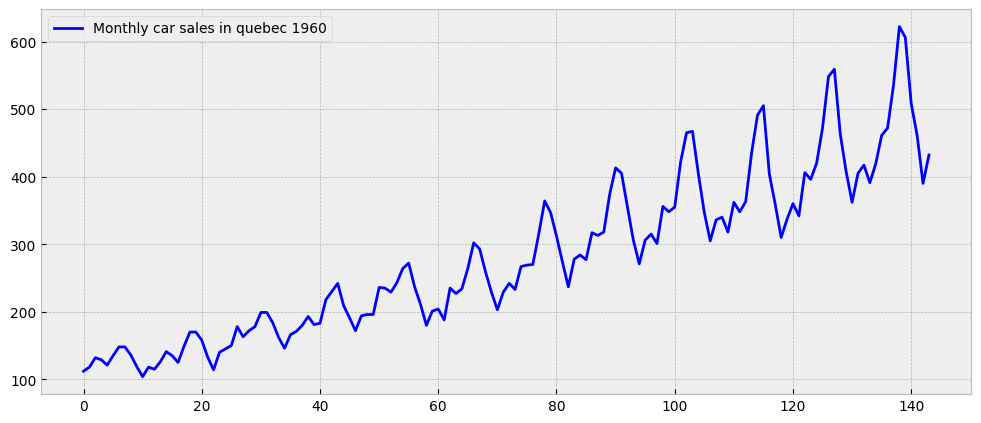

In [94]:
with plt.style.context('bmh'):
    plt.figure(figsize=(12, 5))
    plt.plot(data["Count"], color='blue',label='Monthly car sales in quebec 1960')
    plt.legend()

## 2 Cтроим модель


In [95]:
from statsmodels.tsa.arima.model import ARIMA

In [96]:
series = data.loc[:, ['Count']]
series.head()

,Count
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [150]:
series = data.loc[:, ['Count']]
best_aic = np.inf
best_order = None
best_mdl = None

for i in range(15):
    for d in range(15):
        for j in range(15):
            try:
                tmp_mdl = ARIMA(series, order=(i,d,j), trend='ct').fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Max

aic: 1145.50214 | order: (14, 0, 0)
Results of Dickey-Fuller Test:
Test Statistic                -1.068074e+01
p-value                        3.946373e-19
#Lags Used                     0.000000e+00
Number of Observations Used    1.430000e+02
Critical Value (1%)           -3.476927e+00
Critical Value (5%)           -2.881973e+00
Critical Value (10%)          -2.577665e+00
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


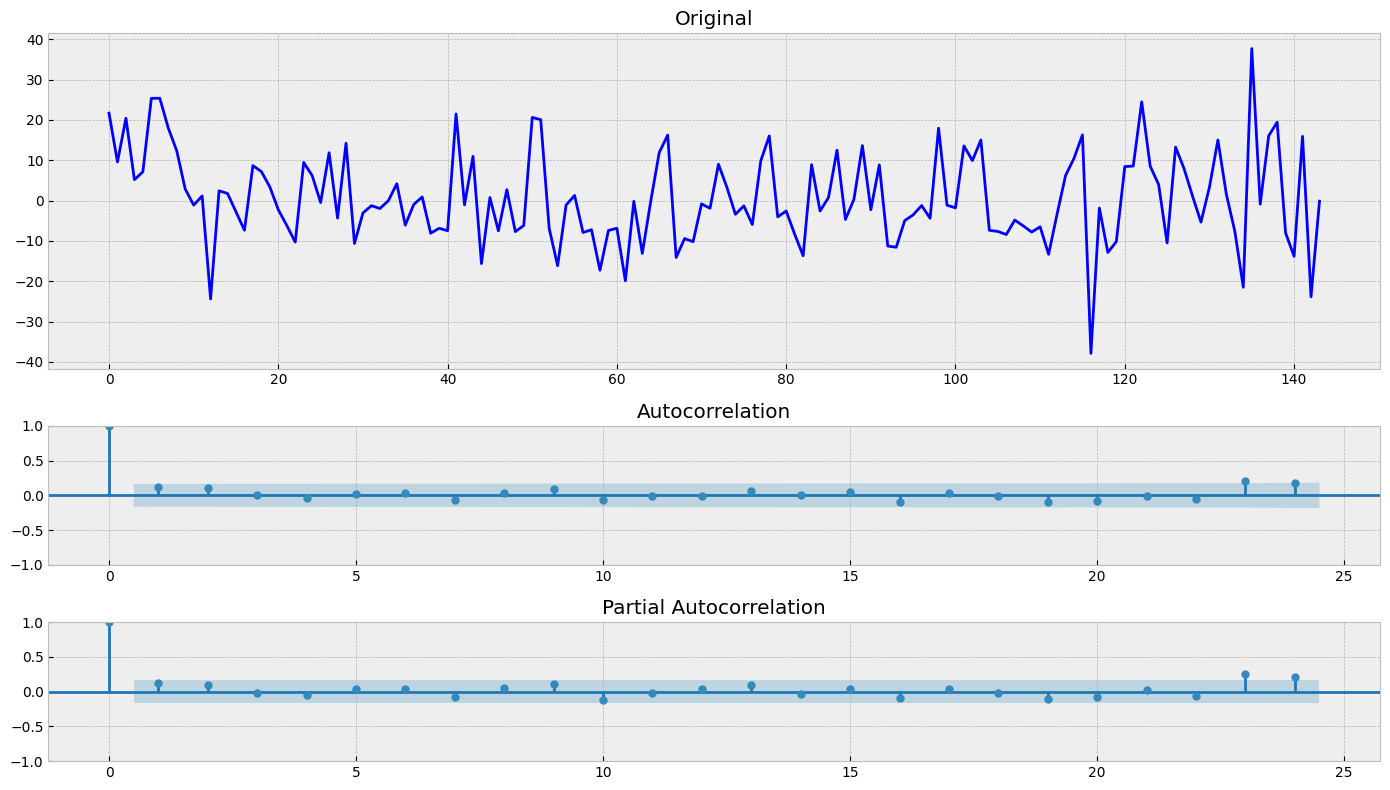

In [151]:
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

tsplot(best_mdl.resid, lags=30)

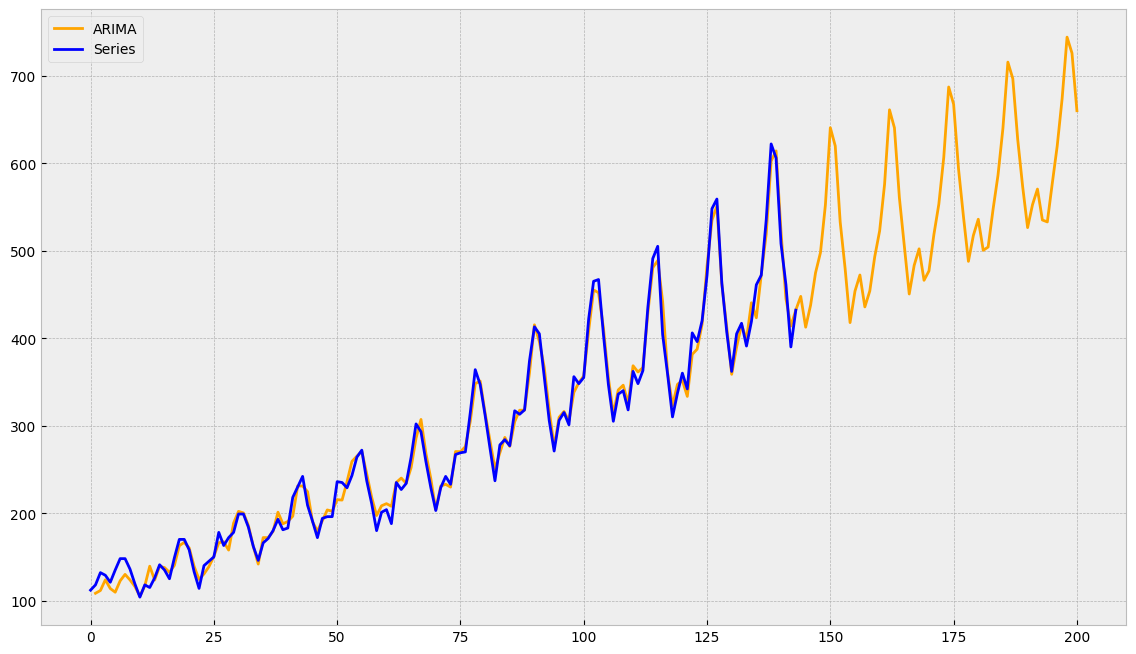

In [152]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plt.plot(best_mdl.predict(1,200), color='orange', label='ARIMA')
    plt.plot(series, color='blue', label='Series')
    plt.legend()
    plt.show()